In [1]:
#importing libraries which will help to solve this problem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # ploting , visualization
import seaborn as sns # ploting
from sklearn import model_selection #scikit learn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn import feature_selection

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6ddb24ebb7624cb8a24b809a517416ec = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GL-qUISAlVd5X0jjsN2gDN6UkBpq6f_R0YehLAFxe-SM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6ddb24ebb7624cb8a24b809a517416ec.get_object(Bucket='prediction-donotdelete-pr-x2ndgqyjwupadv',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
X=df.drop(["Salary"],axis=1)

In [5]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
Y=df["Salary"]

In [7]:
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

In [9]:
model=linear_model.LinearRegression()

In [10]:
model.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
predicted=model.predict(Xtest)

In [12]:
e=np.sqrt(np.mean((Ytest-predicted)**2))

In [14]:
e

6229.172416338358

In [15]:
model.score(Xtrain,Ytrain)

0.9553880313075513

In [16]:
model.score(Xtest,Ytest)

0.9347210011126782

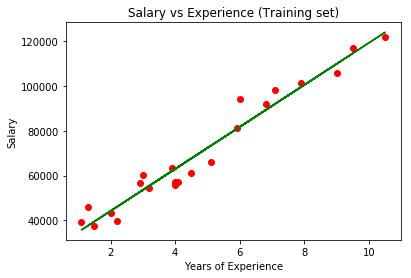

In [20]:
plt.scatter(Xtrain, Ytrain, color = "red")
plt.plot(Xtrain, model.predict(Xtrain), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()